# XGBoost 모델 테스트
---

In [93]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

## [1] 데이터 로딩
---

In [94]:
data_pre = pd.read_csv("./data/data_use.csv", index_col=0)
data_pred = pd.read_csv("./data/data_future.csv", index_col=0)
target = pd.read_csv("./data/target.csv", index_col=0)

# 데이터 병합
data = pd.concat([data_pre, data_pred], axis=0)
data = data.iloc[:468, ]

# 산업용 컬럼 추출
ind_cols = ["TEMP_EF", "POWER_GAS", "ELEC_IND_SUM", "OIL_PRICE", "QVA"]
data = data.loc[:, ind_cols]

# 산업용 타겟 추출
target = target.loc[:, ["IND"]]

In [95]:
target.head()

,IND
DATE,
1996-01-01,83809
1996-02-01,70427
1996-03-01,62652
1996-04-01,47050
1996-05-01,30709


In [96]:
data.head()

,TEMP_EF,POWER_GAS,ELEC_IND_SUM,OIL_PRICE,QVA
DATE,,,,,
1996-01-01,3.744768,8408979,9236808,27.86,36550.300000
1996-02-01,3.732234,7593086,8465308,29.04,36751.000000
1996-03-01,3.621268,8306941,9677322,27.99,36951.700000
1996-04-01,3.460496,8299351,9650845,28.74,37152.400000
1996-05-01,3.305460,8156027,9658045,29.18,37365.733333


## [2] 데이터 전처리
---

### [2-1] 데이터 정규화

### [2-2] 데이터 분할

In [97]:
# 학습, 예측 데이터 분리
data_train = data.iloc[:300,:]

X_train, X_test, y_train, y_test = train_test_split(
    data_train, target , test_size=0.2, random_state=42
)

X_pred = data.iloc[300:, :]

## [3] 모델
---

### [3-1] 모델 생성

In [98]:
model = xgb.XGBRegressor()

params = {
    'max_depth': [3, 5, 7],
    'reg_alpha': [0.001, 0.01, 1, 10],
    'min_child_weight': [0.5, 1, 3, 5],
    'colsample_bytree': [0.3, 0.5, 0.7, 1],
}

grid = GridSearchCV(
    model,
    params,
    cv=5
)

grid.fit(X_train, y_train)
grid.best_params_

{'colsample_bytree': 0.7,
 'max_depth': 5,
 'min_child_weight': 5,
 'reg_alpha': 0.001}

In [99]:
best_params = grid.best_params_

model = xgb.XGBRegressor(
    **best_params
)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9802979747372096

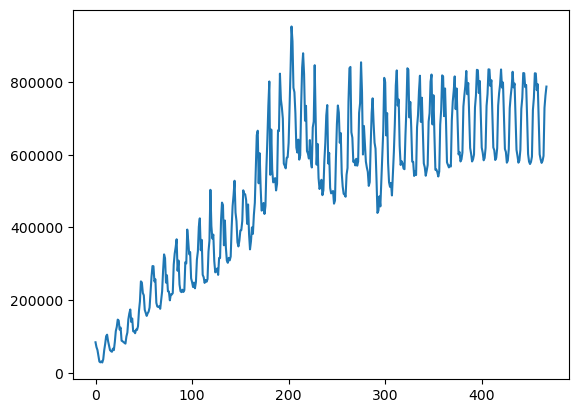

In [100]:
pred = list(target["IND"]) + list(model.predict(X_pred))

plt.plot(pred);